# Bank Loan Prediction Project

Importing necessory Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
#machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, roc_auc_score
sns.set()

Reading DataSet

In [2]:
os.chdir(r'C:\Users\Komal\Downloads\Datasets')

In [3]:
data=pd.read_csv('UniversalBank.csv')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


Visualization

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
#Preprocessing
data.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [8]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [9]:
data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

C:\Users\Komal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

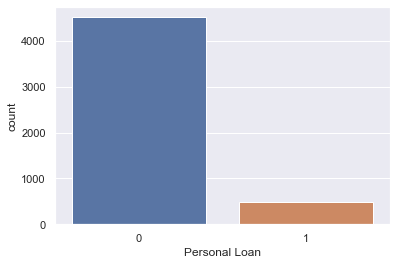

In [10]:
sns.countplot('Personal Loan',data=data)

In [4]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

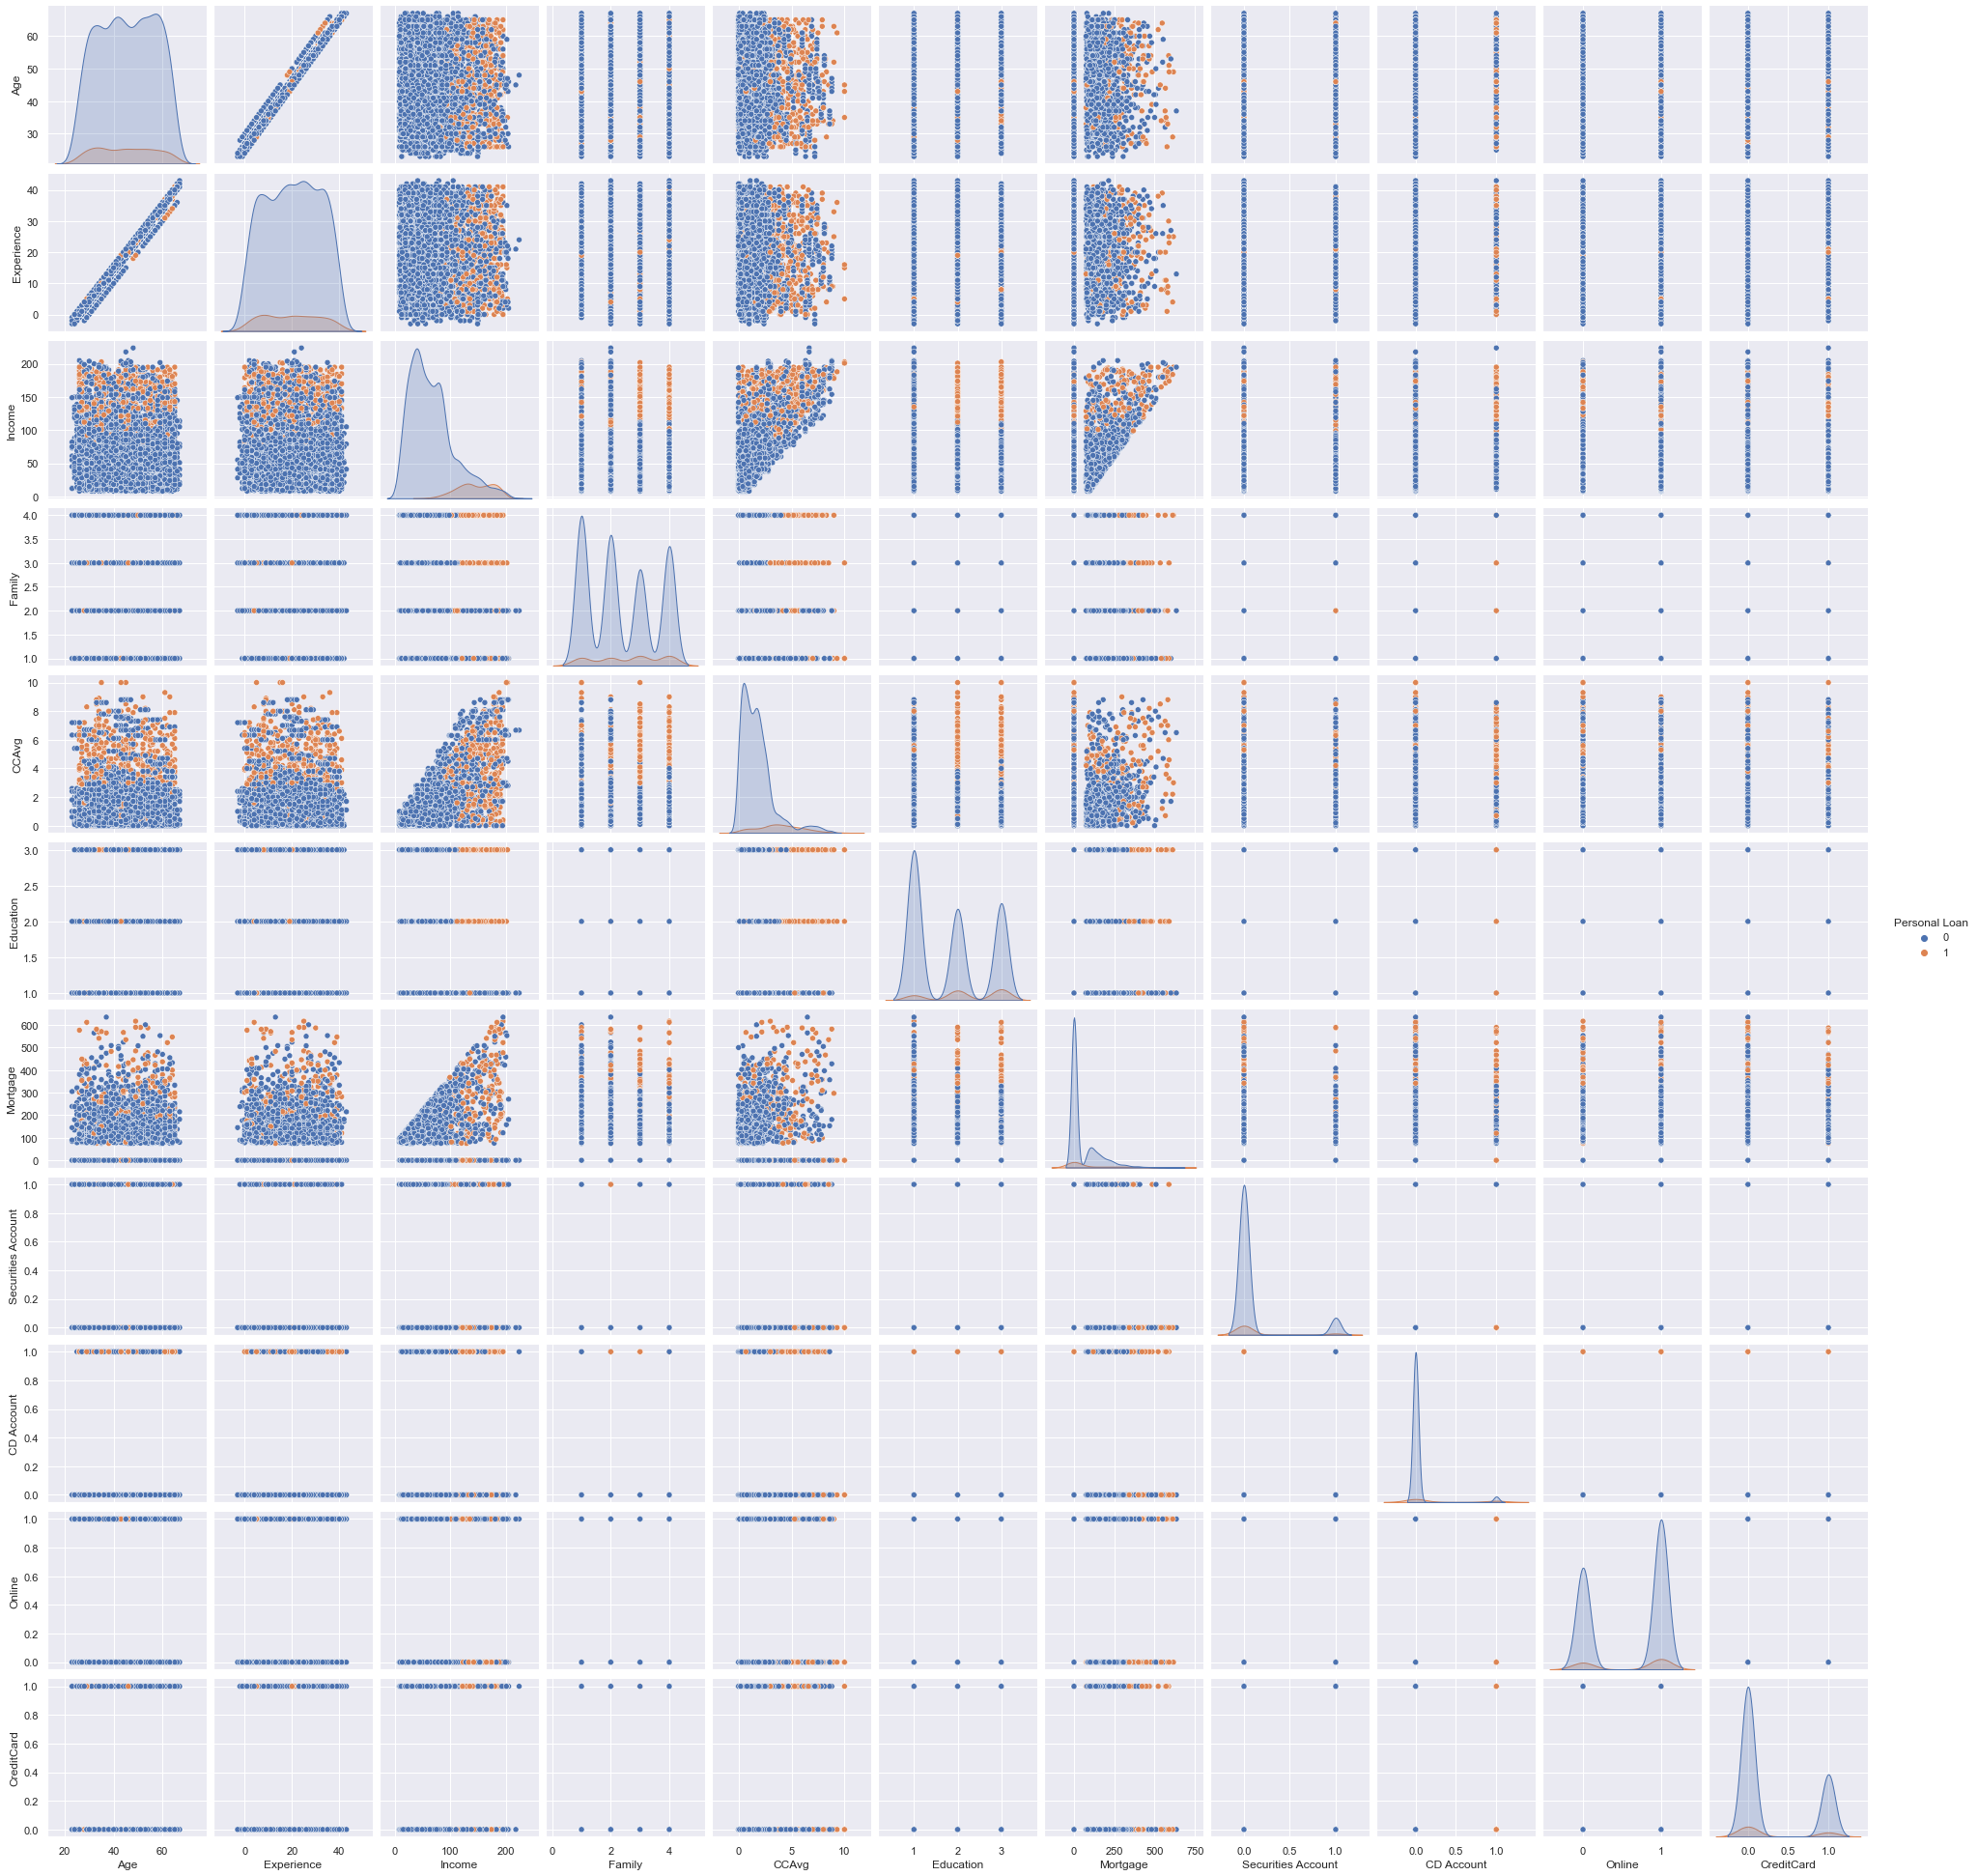

In [18]:
sns.pairplot(data,hue='Personal Loan')

<AxesSubplot:xlabel='Education', ylabel='Income'>

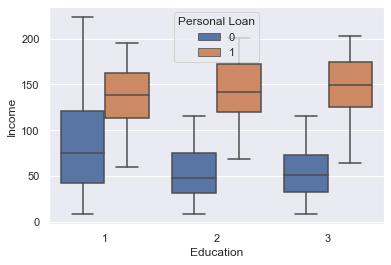

In [7]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

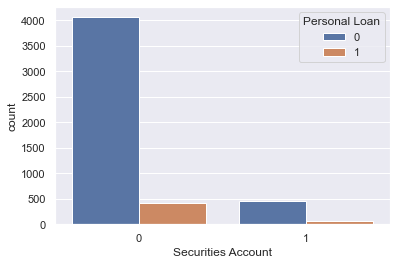

In [8]:
sns.countplot(x='Securities Account',data=data,hue='Personal Loan')

<AxesSubplot:>

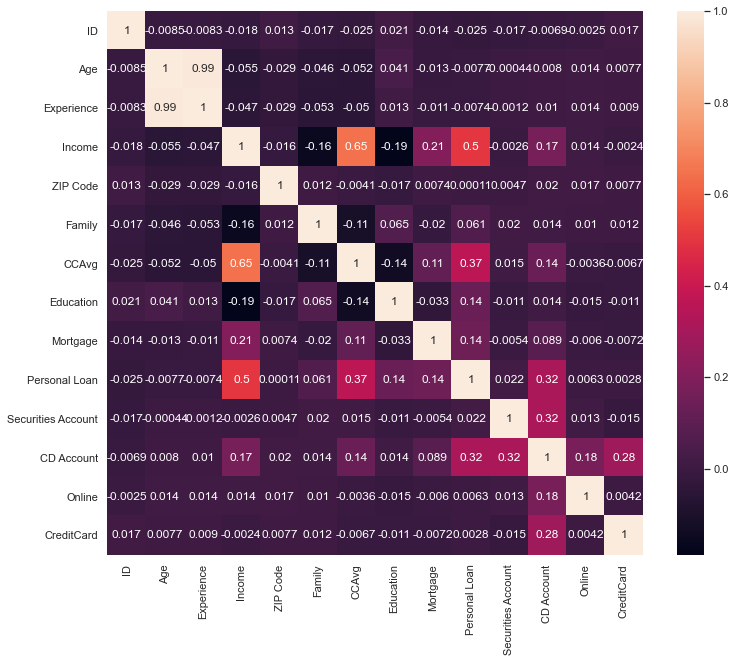

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

In [13]:
x=data.drop(['Personal Loan'],axis=1)
y=data['Personal Loan']

Standardarization

In [14]:
sc=StandardScaler()
scaled_data=sc.fit_transform(x)
scaled_data

array([[-1.73170443, -1.77441684, -1.66607847, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-1.73101161, -0.02952359, -0.09633022, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-1.73031879, -0.55299157, -0.44516316, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ...,
       [ 1.73031879,  1.54088033,  1.64783451, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.73101161,  1.71536965,  1.73504275, ..., -0.25354028,
         0.82195086, -0.64531434],
       [ 1.73170443, -1.51268285, -1.40445376, ..., -0.25354028,
         0.82195086,  1.54963239]])

Train-Test-Split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.30,random_state=42)

# 1) Logistic Regression

In [16]:
model_1=LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

In [17]:
model_1.score(x_train,y_train)

0.9511428571428572

In [18]:
y_pred=model_1.predict(x_test)

In [19]:
model1_accuracy=accuracy_score(y_test,y_pred)
model1_accuracy

0.954

In [20]:
result=confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(result)
result1=classification_report(y_test,y_pred)
print('classification report:')
print(result1)

confusion matrix:
[[1353   19]
 [  50   78]]
classification report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1372
           1       0.80      0.61      0.69       128

    accuracy                           0.95      1500
   macro avg       0.88      0.80      0.83      1500
weighted avg       0.95      0.95      0.95      1500



In [21]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1353,   19],
       [  50,   78]], dtype=int64)

In [22]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7977633017492711

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

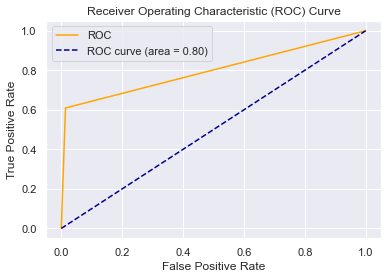

In [22]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 2) Decision Tree

In [24]:
model_2=DecisionTreeClassifier()
model_2.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
model_2.score(x_train,y_train)

1.0

In [26]:
model2_accuracy1=model_2.score(x_test,y_test)
model2_accuracy1

0.9786666666666667

In [27]:
y_pred=model_2.predict(x_test)

In [28]:
auc=roc_auc_score(y_test,y_pred)
auc

0.9458363702623906

In [29]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [30]:
grid_search = GridSearchCV(estimator=model_2,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [31]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [32]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 8, 'splitter': 'best'}


In [33]:
model2_accuracy=grid_search.best_score_
model2_accuracy

0.9851428571428571

In [34]:
result=confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(result)
result1=classification_report(y_test,y_pred)
print('classification report:')
print(result1)

confusion matrix:
[[1352   20]
 [  12  116]]
classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1372
           1       0.85      0.91      0.88       128

    accuracy                           0.98      1500
   macro avg       0.92      0.95      0.93      1500
weighted avg       0.98      0.98      0.98      1500



In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

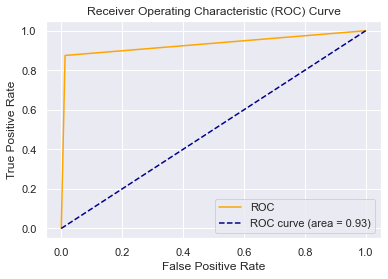

In [35]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 3) Random Forest

In [74]:
model_3=RandomForestClassifier()
model_3.fit(x_train,y_train)

RandomForestClassifier()

In [75]:
model_3.score(x_train,y_train)

1.0

In [76]:
model_3.score(x_test,y_test)

0.988

In [77]:
y_preds=model_3.predict(x_test)

In [78]:
model3_accuracy=accuracy_score(y_test,y_preds)
model3_accuracy

0.988

In [79]:
result=confusion_matrix(y_test,y_preds)
print('confusion matrix:')
print(result)
result1=classification_report(y_test,y_preds)
print('classification report:')
print(result1)

confusion matrix:
[[1340    3]
 [  15  142]]
classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.98      0.90      0.94       157

    accuracy                           0.99      1500
   macro avg       0.98      0.95      0.97      1500
weighted avg       0.99      0.99      0.99      1500



In [80]:
auc=roc_auc_score(y_test,y_preds)
auc

0.9511123969058719

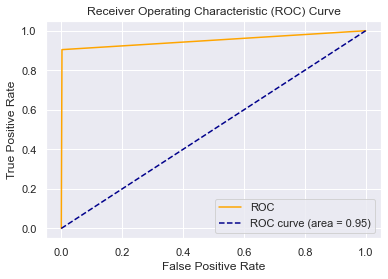

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 4) Support Vector Classifier

In [41]:
model_4=SVC()
model_4.fit(x_train, y_train)

SVC()

In [42]:
model_4.score(x_train,y_train)

0.978

In [43]:
y_pred=model_4.predict(x_test)

In [44]:
model4_accuracy4=accuracy_score(y_test,y_pred)
model4_accuracy4

0.9706666666666667

In [45]:
param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001]}

In [46]:
grid= GridSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

In [47]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   17.6s finished


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100, 500],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
             verbose=3)

In [48]:
grid.best_params_

{'C': 50, 'gamma': 0.01}

In [49]:
model_new=SVC(C=50, gamma=0.01)
model_new.fit(x_train,y_train)

SVC(C=50, gamma=0.01)

In [50]:
y_predss=model_new.predict(x_test)

In [51]:
model4_accuracy=accuracy_score(y_test,model_new.predict(x_test))
model4_accuracy

0.9793333333333333

In [52]:
result=confusion_matrix(y_test,y_predss)
print('confusion matrix:')
print(result)
result1=classification_report(y_test,y_predss)
print('classification report:')
print(result1)

confusion matrix:
[[1369    3]
 [  28  100]]
classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1372
           1       0.97      0.78      0.87       128

    accuracy                           0.98      1500
   macro avg       0.98      0.89      0.93      1500
weighted avg       0.98      0.98      0.98      1500



In [56]:
auc=roc_auc_score(y_test,y_predss)
auc

0.9047922740524781

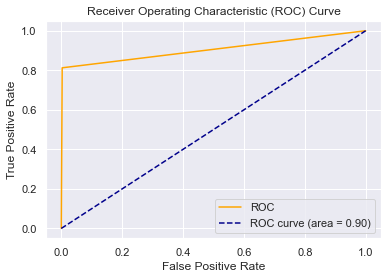

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_predss)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# 5) Navie_Bayes

In [53]:
model_5=GaussianNB()
model_5.fit(x_train, y_train)

GaussianNB()

In [54]:
model_5.score(x_train,y_train)

0.8825714285714286

In [55]:
model5_accuracy=model_5.score(x_test,y_test)
model5_accuracy

0.8853333333333333

In [56]:
y_pred=model_5.predict(x_test)

In [57]:
result=confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(result)
result1=classification_report(y_test,y_pred)
print('classification report:')
print(result1)

confusion matrix:
[[1254  118]
 [  54   74]]
classification report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1372
           1       0.39      0.58      0.46       128

    accuracy                           0.89      1500
   macro avg       0.67      0.75      0.70      1500
weighted avg       0.91      0.89      0.90      1500



In [58]:
auc=roc_auc_score(y_test,y_pred)
auc

0.746059584548105

MODEL_CAMPARISON

In [82]:
models=pd.DataFrame({'Model':['Logistic Regression',
                              'Decision Tree','Random Forest',
                              'Support Vector Classifier','Navie Bayes'],
                    'Score':[model1_accuracy,model2_accuracy,
                             model3_accuracy,model4_accuracy,
                             model5_accuracy]})
models.sort_values(by='Score',ascending=False)

,Model,Score
2,Random Forest,0.988000
1,Decision Tree,0.985143
3,Support Vector Classifier,0.979333
0,Logistic Regression,0.954000
4,Navie Bayes,0.885333


In [83]:
import pickle
filename='bankloan.pkl'
pickle.dump(model_3,open(filename,'wb'))